# Analysis for Instagram Reach Analysis Dataset
- In this project, I will work on the Instagram Reach Analysis Dataset, which has some Instagram analysis

### About the Dataset
- Comprehensive Instagram Dataset that provides information about an account, including some details like Impressions, likes, and Follows

###  Instagram Reach Analysis Dataset distribution 
---
- Below is a description of a common field in the Instagram dataset:
---
#### **Core Fields** 
- **` Impression:`** Total number of times the post was displayed.
- **` From Home:`** Number of impressions from the Home feed.
- **` From Hashtags:`** Number of impressions generated specifically through hashtags.
- **` From others:`** Impressions from other sources.
- **` Saves:`** Number of times users saved the post to their collections.
- **` comments:`** Total number of comments on the post.
- **` share:`** Number of times the post was shared or sent via DM or to stories.
- **` likes:`** Number of likes received on the post.
- **` profile visits:`** Number of times users visited the profile as a result of this post.
- **` Follows:`** Number of new followers gained directly from this post.
- **` Caption:`**  The text description or caption attached to the post.
- **` Hashtags:`** the hashtags used in the post's caption or comment.

### Questions to be answered
- Calculate reach and engagement metrics for each post?
- Provide visualizations to enhance understanding of the data?
- What is the most common thing that fuels interactions?
- Is there a relation between profile visits and follows caused by the post?
- What qualities are common to the posts that get the highest engagement?
- Which posts drove the most visitors to the account?
- Does the length of the caption have anything to do with the number of likes?
- What are the most popular hashtags?


### Feature Extraction 
- Add Total engagement columns
- Add hashtags popular columns
- Add caption length columns

In [3]:
# Load the needed Libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns 

In [22]:
# Load the dataset into a pandas DataFrame 
df = pd.read_csv(r"D:\lectures\lect10\Instagram data.csv",encoding = 'latin1')

### Data wrangling 
- exploring the Data by printing some rows
- Check for duplicates and remove them if found
- Add some columns to help in the analysis process

In [23]:
# Display first 5 rows
df.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


In [24]:
# Take a copy from data
df_copy = df.copy()

In [25]:
# Check for null values
df.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

### Theres is no null value

In [26]:
# Check for duplicated
df.duplicated().sum()

17

In [27]:
# Remove duplicated values
df.drop_duplicates(inplace = True)

In [28]:
# Recheck for duplicated
df.duplicated().sum()

0

In [29]:
# Get the shape of data
df.shape

(102, 13)

#### I found that we have 102 post represented by 13 feature 

In [30]:
# Take some info 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     102 non-null    int64 
 1   From Home       102 non-null    int64 
 2   From Hashtags   102 non-null    int64 
 3   From Explore    102 non-null    int64 
 4   From Other      102 non-null    int64 
 5   Saves           102 non-null    int64 
 6   Comments        102 non-null    int64 
 7   Shares          102 non-null    int64 
 8   Likes           102 non-null    int64 
 9   Profile Visits  102 non-null    int64 
 10  Follows         102 non-null    int64 
 11  Caption         102 non-null    object
 12  Hashtags        102 non-null    object
dtypes: int64(11), object(2)
memory usage: 11.2+ KB


In [31]:
# Descriptive Analysis of Data
df.describe()


,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,5920.254902,2496.911765,1968.284314,1178.568627,184.549020,156.549020,6.352941,9.303922,176.823529,54.666667,22.823529
std,5139.888111,1588.377397,1977.298128,2797.212621,309.096051,157.770332,3.308097,10.150149,85.151747,93.169954,43.685966
min,1941.000000,1133.000000,116.000000,0.000000,9.000000,22.000000,0.000000,0.000000,72.000000,4.000000,0.000000
25%,3556.000000,1923.750000,753.000000,178.750000,40.250000,70.500000,4.000000,3.000000,122.000000,16.000000,4.000000
50%,4343.500000,2216.000000,1326.000000,337.000000,75.000000,111.000000,6.000000,6.500000,157.500000,24.000000,8.000000
75%,6296.250000,2605.250000,2415.750000,728.500000,218.500000,173.500000,8.000000,13.000000,208.750000,45.750000,18.000000
max,36919.000000,13473.000000,11817.000000,17414.000000,2547.000000,1095.000000,19.000000,75.000000,549.000000,611.000000,260.000000


#### we have a lot of outliers in data

In [239]:
# Create a function to replace outliers with the mode
def replace_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    mode = df[col].mode()[0]
    
    df[col] = df[col].apply(lambda x : mode if x < lower_bound or x > upper_bound else x )

    return df

In [240]:
# Create numerical columns
numerical_columns = ['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows']

In [241]:
# Apply the function on df
for col in numerical_columns:
    df = replace_outliers(df,col)

In [32]:
# show columns
df.columns

Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags'],
      dtype='object')

In [44]:
# Add Total Engagement column
df['Total_Engagement'] =  df['Likes'] + df['Saves'] + df['Comments'] + df['Shares']


In [45]:
# Get a sample
df.sample(1)

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags,Total_Engagement
10,2218,1597,411,162,15,28,6,3,81,29,4,Learn the implementation of AlexNet Convolutio...,#neuralnetwork #machinelearning #artificialint...,118


In [46]:
# Add caption length column
df['caption_length'] = df['Caption'].apply(lambda x : len(str(x).split(" ")))

In [47]:
# Check 
df['caption_length']

0      16
1      34
2      20
3      41
4      28
       ..
114    16
115    50
116    34
117    16
118    14
Name: caption_length, Length: 102, dtype: int64

In [50]:
# Creat Hashtag list
df['Hashtag_list']= df['Hashtags'].str.split('#')

In [51]:
# Check
df['Hashtag_list']

0      [, finance , money , business , investing , in...
1      [, healthcare , health , covid , data , datasc...
2      [, data , datascience , dataanalysis , dataana...
3      [, python , pythonprogramming , pythonprojects...
4      [, datavisualization , datascience , data , da...
                             ...                        
114    [, datascience , datasciencejobs , datascience...
115    [, machinelearning , machinelearningalgorithms...
116    [, machinelearning , machinelearningalgorithms...
117    [, datascience , datasciencejobs , datascience...
118    [, python , pythonprogramming , pythonprojects...
Name: Hashtag_list, Length: 102, dtype: object

In [52]:
# Creat hashtag count column
df['hashtag_count'] = df['Hashtag_list'].apply(lambda x : len(str(x).split(" ")))

In [53]:
# Check
df['hashtag_count']

0      23
1      19
2      19
3      12
4      30
       ..
114    18
115    19
116    19
117    18
118    12
Name: hashtag_count, Length: 102, dtype: int64

In [54]:
# Explode Hashtag_list colum
Ex_hashtags = df.explode('Hashtag_list')

In [56]:
# Check 
Ex_hashtags.sample(1)

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags,Total_Engagement,caption_length,Hashtag_count,Hashtag_list,hashtag_count
41,4998,2331,2195,318,75,167,4,13,180,21,8,Here is how you can prepare yourself for your ...,#data #datascience #dataanalysis #dataanalytic...,364,14,"[, data , datascience , dataanalysis , dataana...",datascientist,20


In [61]:
# Get popular hashtags
popular_hashtags = Ex_hashtags['Hashtag_list'].value_counts().reset_index()

In [62]:
# Chack
popular_hashtags.head(5)

,Hashtag_list,count
0,,102
1,amankharwal,93
2,python,93
3,pythonprogramming,84
4,machinelearning,80


In [63]:
# Remove empty values
popular_hashtags.drop(labels = 0 , inplace = True)

In [65]:
# top 10 Hashtags
popular_hashtags.head(10)

,Hashtag_list,count
1,amankharwal,93
2,python,93
3,pythonprogramming,84
4,machinelearning,80
5,datascience,79
6,ai,77
7,artificialintelligence,75
8,data,74
9,pythonprojects,74
10,dataanalytics,73


In [73]:
# Save data
df.to_csv('instagram rech analysis 1', index = False)

In [74]:
# Reload data
df = pd.read_csv('instagram rech analysis 1')

In [86]:
# display first rows
df.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags,Total_Engagement,caption_length,Hashtag_list,hashtag_count,Reach
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...,274,16,"['', 'finance\xa0', 'money\xa0', 'business\xa0...",23,0.069898
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...,439,34,"['', 'healthcare\xa0', 'health\xa0', 'covid\xa...",19,0.081387
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...,184,20,"['', 'data\xa0', 'datascience\xa0', 'dataanaly...",19,0.045760
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...,402,41,"['', 'python\xa0', 'pythonprogramming\xa0', 'p...",12,0.088781
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...,228,28,"['', 'datavisualization\xa0', 'datascience\xa0...",30,0.090548


### EDA (Exploratory Data Analysis)
1. Calculate reach and engagement metrics for each post?

In [87]:
# create Engagement Rate column
# مقياس مدي تفاعل الجمهور
df ['Engagement_Rate'] = df['Total_Engagement'] / df['Impressions']

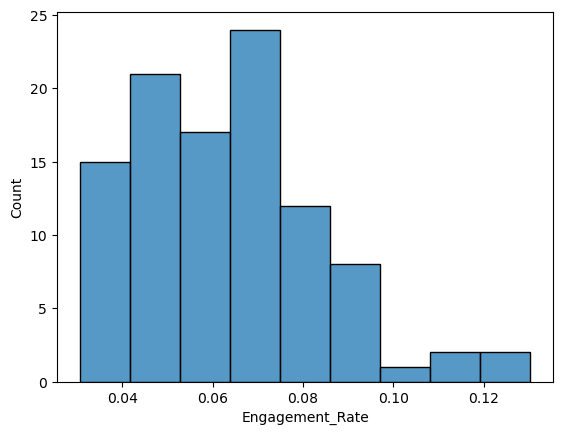

In [206]:
# Create histogrram to Engagement Rate
sns.histplot( df , x = df['Engagement_Rate']  )
plt.show()

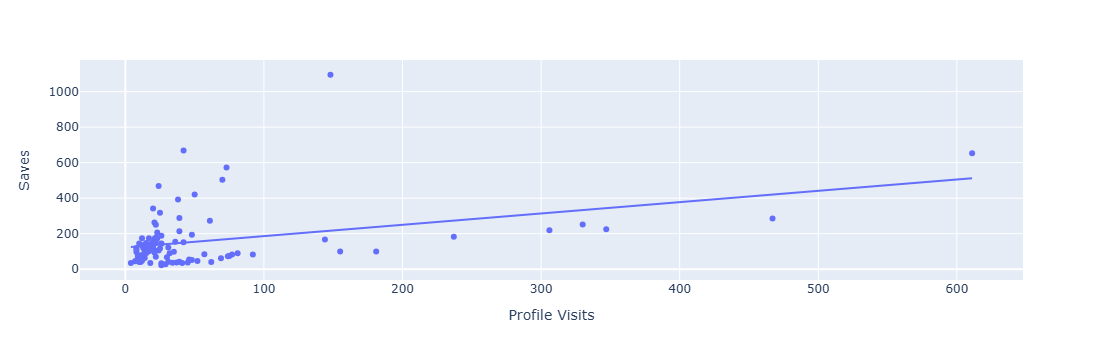

In [213]:
# Sea relation between profile visits and saves
px.scatter( df , x = df['Profile Visits'] , y = 'Saves',trendline = 'ols' )


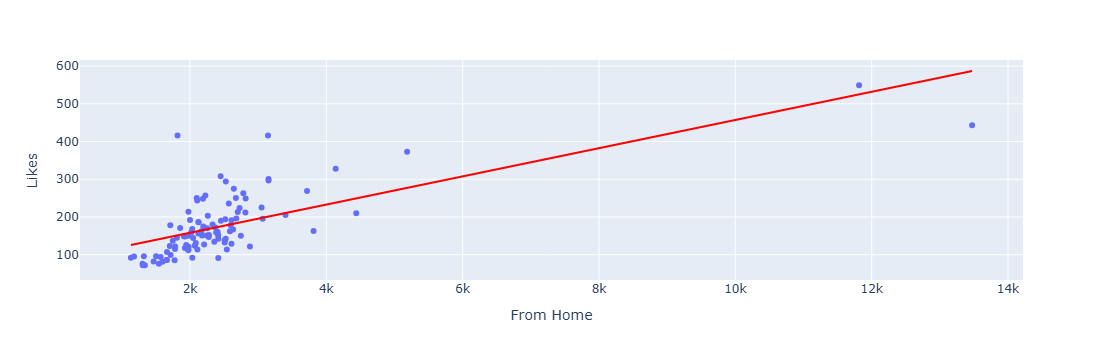

In [201]:
# Show the relation between From home and likes
px.scatter(df , x =df['From Home'] , y = 'Likes',trendline= 'ols',trendline_color_override= 'red')

In [95]:
# ROM to Reach in this data
#تقدير تقريبي 
df['Reach'] = df['Impressions']/1.2

In [216]:
# Rech and Engagement in some posts 
df[['Engagement_Rate', 'Total_Engagement', 'Reach', 'Impressions']].sample(5)

,Engagement_Rate,Total_Engagement,Reach,Impressions
16,0.087706,351,3335.000000,4002
64,0.093647,709,6309.166667,7571
53,0.074782,481,5360.000000,6432
51,0.085922,603,5848.333333,7018
5,0.060505,235,3236.666667,3884


In [218]:
# Descriptive Analysis to Reach and Engagement 
df[['Engagement_Rate', 'Total_Engagement', 'Reach', 'Impressions']].head().describe()

,Engagement_Rate,Total_Engagement,Reach,Impressions
count,5.000000,5.000000,5.000000,5.000000
mean,0.075275,305.400000,3396.833333,4076.200000
std,0.018392,110.561295,873.625190,1048.350228
min,0.045760,184.000000,2098.333333,2518.000000
25%,0.069898,228.000000,3266.666667,3920.000000
50%,0.081387,274.000000,3350.833333,4021.000000
75%,0.088781,402.000000,3773.333333,4528.000000
max,0.090548,439.000000,4495.000000,5394.000000


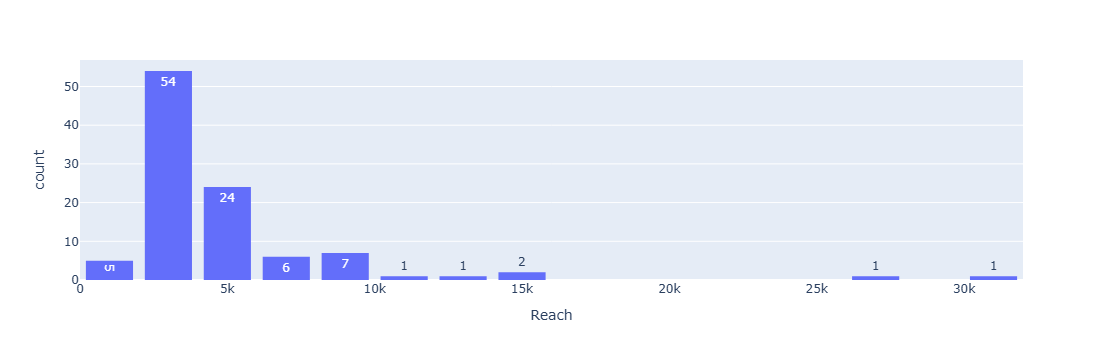

In [214]:
# Create a hist to Reach column
fig = px.histogram(df, x='Reach',  nbins=20, text_auto=True)
fig.update_layout(bargap=0.2)
fig.show()

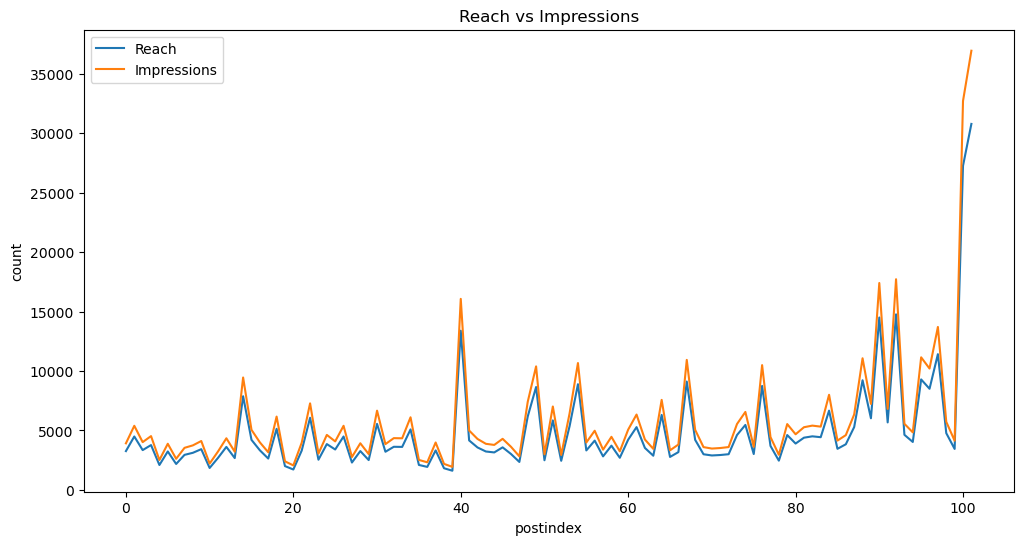

In [113]:
# Check the difference between Reach and Impressions
plt.figure(figsize = (12,6))
plt.plot(df['Reach'],label='Reach')
plt.plot(df['Impressions'],label = 'Impressions')
plt.xlabel('postindex')
plt.ylabel('count')
plt.title('Reach vs Impressions')
plt.legend()
plt.show()


- More likes and saves will help to get more reach on Instagram

2. Provide visualizations for better understanding of the data

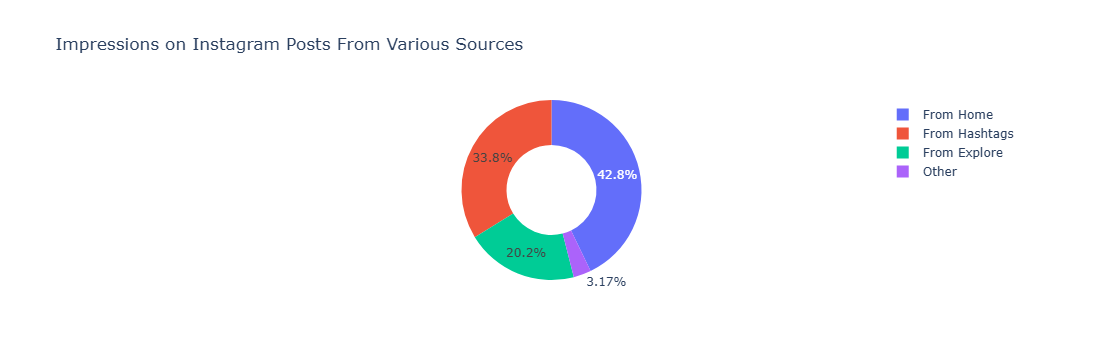

In [143]:
# The percentage of impressions I get from various sources on Instagram
home = df["From Home"].sum()
hashtags = df["From Hashtags"].sum()
explore = df["From Explore"].sum()
other = df["From Other"].sum()

labels = ['From Home','From Hashtags','From Explore','Other']
values = [home, hashtags, explore, other]

fig = px.pie(df, values=values, names=labels, 
             title='Impressions on Instagram Posts From Various Sources', hole=0.5)
fig.show()

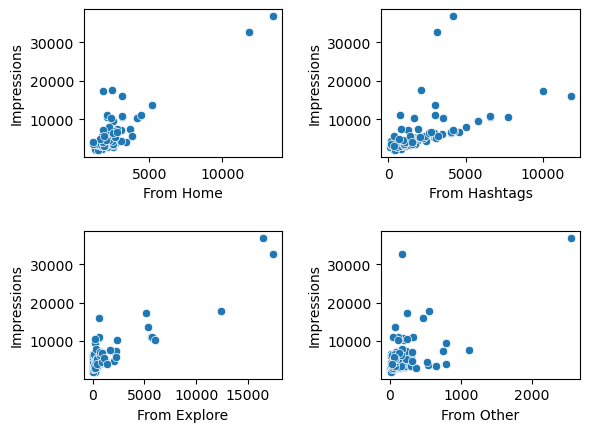

In [121]:
## Create visualizations from Home, Hashtags, Explore, and other sections with the Impressions column
plt.subplot(2,2,1)
sns.scatterplot(df , x='From Home',y='Impressions')

plt.subplot(2,2,2)
sns.scatterplot(df , x='From Hashtags',y='Impressions')

plt.subplot(2,2,3)
sns.scatterplot(df , x='From Explore',y='Impressions')

plt.subplot(2,2,4)
sns.scatterplot(df , x='From Other',y='Impressions')

plt.subplots_adjust(wspace=0.5,hspace=0.5)

plt.show()


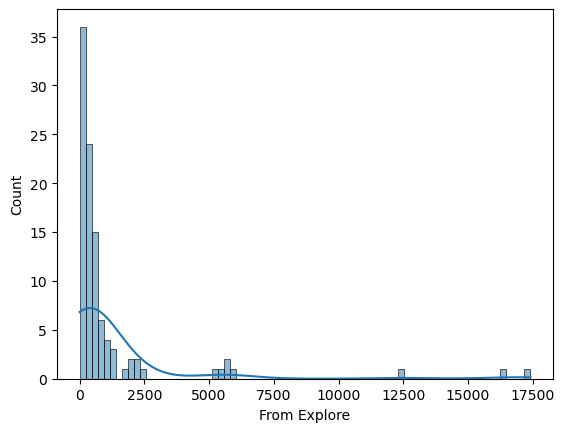

In [219]:

sns.histplot(df['From Explore'],kde=True)

plt.show()

- I found Instagram don't recommend post to user 

3. Is there a relation between profile visits and follows caused by the post?

In [141]:
# see percentage followers to profile visits
perc = (df['Follows'].sum()/df['Profile Visits'].sum())*100
print(perc)

41.75035868005739


- so the percentage is 41% which sound like very good for instagram account

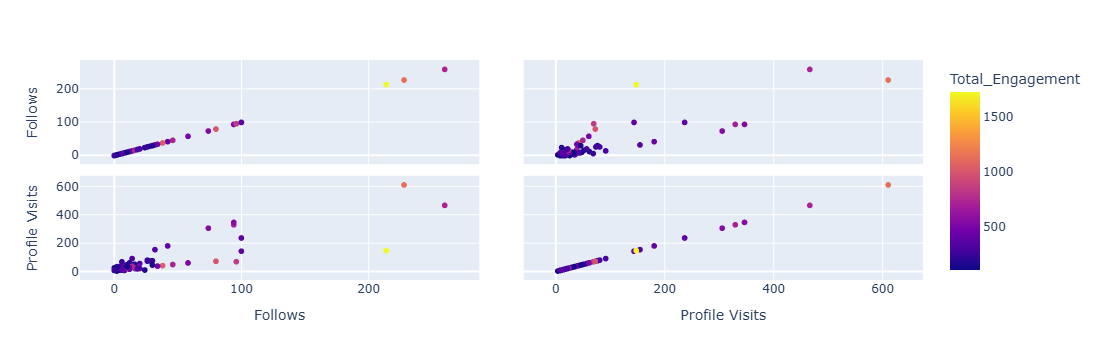

In [124]:
## Show the relation between the number of new followers and Profile visits
#Follows vs Profile Visits
fig = px.scatter_matrix(df, dimensions=["Follows", "Follows", "Profile Visits", "Profile Visits"], color="Total_Engagement")
fig.show()

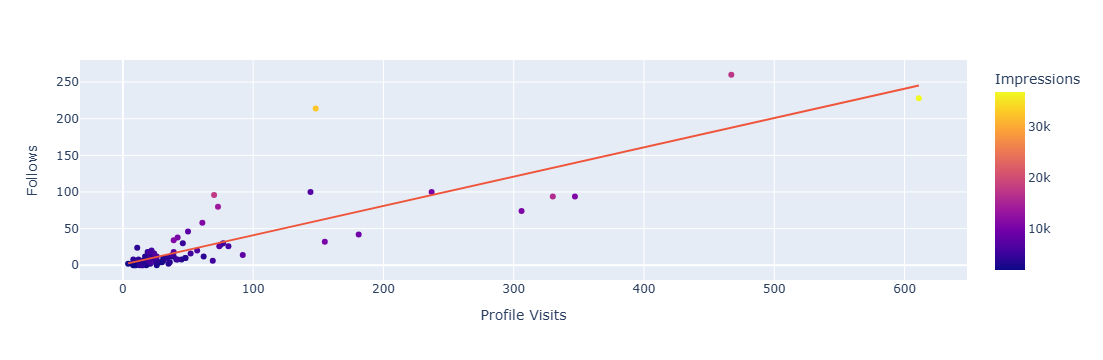

In [139]:

px.scatter(df,x='Profile Visits',y='Follows',color='Impressions',trendline='ols')


- The relationship between profile visits and followers gained is also linear
- 41% of profile visits have been from new followers, and this is very good to improve this account

4. What is the most common thing that fuels interactions?

In [223]:
# Take a correlation matrix for the data 
correlation_matrix = df.corr(numeric_only=True)['Total_Engagement']
print(correlation_matrix)

Impressions         0.839993
From Home           0.783897
From Hashtags       0.430704
From Explore        0.754091
From Other          0.359117
Saves               0.981266
Comments            0.068998
Shares              0.861283
Likes               0.930257
Profile Visits      0.483198
Follows             0.707364
Total_Engagement    1.000000
caption_length     -0.191706
hashtag_count      -0.292294
Reach               0.839993
Engagement_Rate     0.237903
Reach_Estimate      0.839993
PostID              0.375022
Name: Total_Engagement, dtype: float64


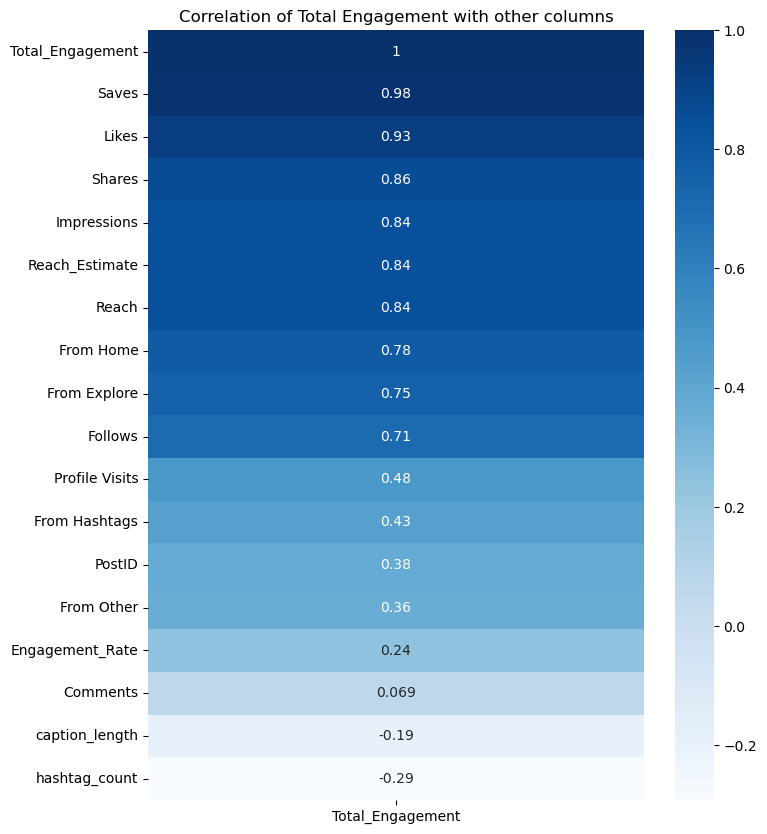

In [235]:
# Heatmap to Total Engagement column 
corr = df.corr(numeric_only = True)
corr_total = corr[['Total_Engagement']].sort_values(by='Total_Engagement',ascending= False)

plt.figure(figsize=(8, 10))
sns.heatmap(corr_total,annot= True,cmap='Blues',cbar=True)
plt.title('Correlation of Total Engagement with other columns')
plt.show()

- I found the most common are saves,l ikes, comments, shares, and from home
- Since most of the engagement on this account starts with a save, then a like, followed by a share, this indicates that the content provided is valuable to the audience.

 5. Which posts drove the most visitors to the account?

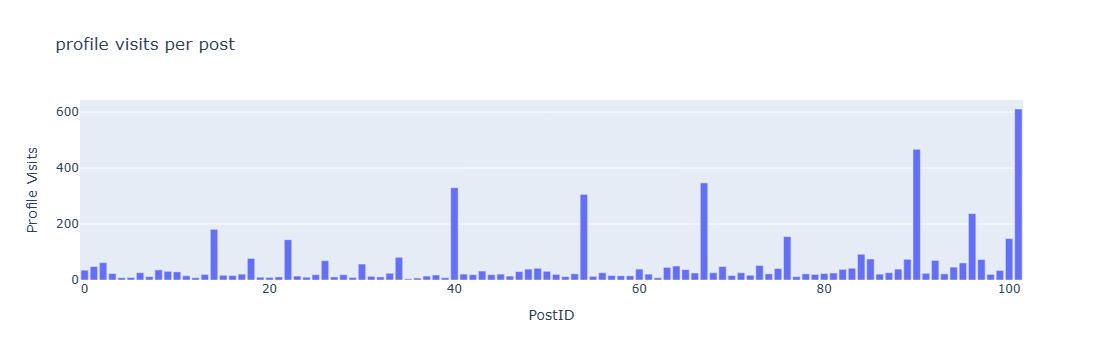

In [155]:
df['PostID'] = df.index  # creat id for every post

px.bar(df, x='PostID', y='Profile Visits', title='profile visits per post')


In [161]:
# posts which has a most visitors 
df[['PostID','Profile Visits']].sort_values(by='Profile Visits',ascending=False).head(10)

,PostID,Profile Visits
101,101,611
90,90,467
67,67,347
40,40,330
54,54,306
96,96,237
14,14,181
76,76,155
100,100,148
22,22,144


- We recommend reviewing the posts with the highest number of visitors to see the types of content that drove traffic to the account and to understand what the audience cared about, leading to their widespread reach.

6. Does the length of the captain have anything to do with the number of likes?

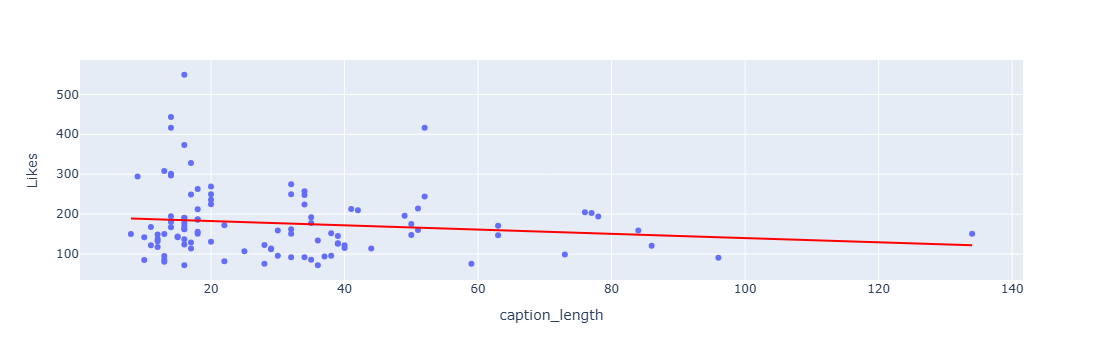

In [167]:
px.scatter(df,x='caption_length',y='Likes',trendline= 'ols',trendline_color_override= 'red')

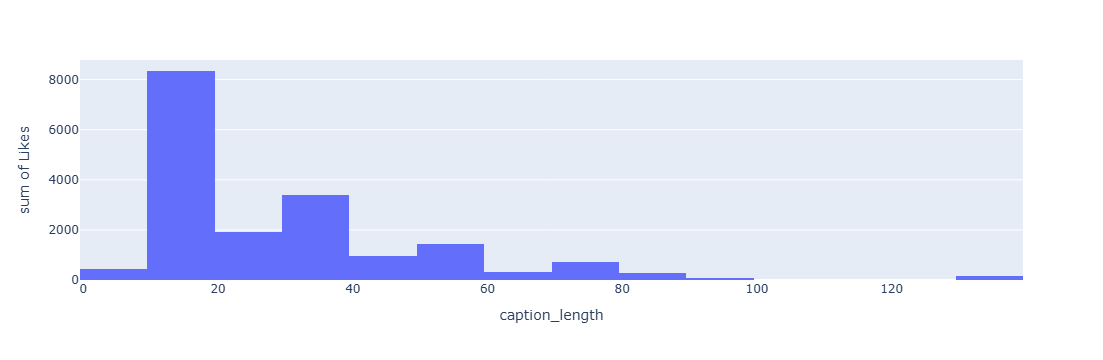

In [168]:
px.histogram(df,x='caption_length',y='Likes')

- It's have a Inverse Relationship meaning caption length not effect on number of likes

7. What are the most popular hashtags?

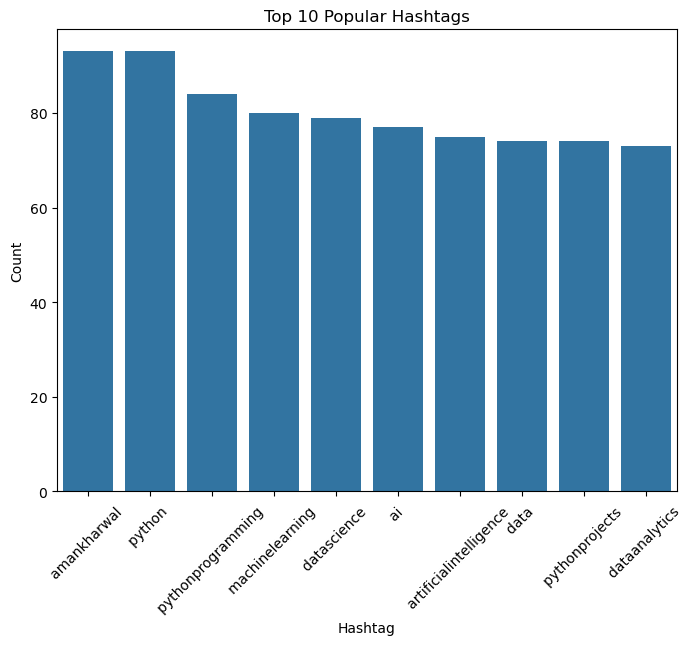

In [238]:
# visoul to top10 Hashtas
plt.figure(figsize=(8, 6))
sns.barplot(data=popular_hashtags.head(10), x='Hashtag_list',y='count', legend=False)
plt.title('Top 10 Popular Hashtags')
plt.xlabel('Hashtag')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [187]:
# df for top10 
popular_hashtags.head(10)

,Hashtag_list,count
1,amankharwal,93
2,python,93
3,pythonprogramming,84
4,machinelearning,80
5,datascience,79
6,ai,77
7,artificialintelligence,75
8,data,74
9,pythonprojects,74
10,dataanalytics,73
